## Customer Segmentation with Machine Learning in Python


In [7]:
# import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import itertools
import collections
from collections import Counter 
from collections import defaultdict 
from scipy import stats
import sklearn
import rise
import sklearn.metrics 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 
from sklearn.manifold import  TSNE
from sklearn.cluster import KMeans

## Importing data 

df=pd.read_csv('Mall_Customers.csv')


## Descriptive Analytics

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [29]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Visualization and Feature Engineering

In [ ]:
Data =df[["Age","Annual Income (k$)","Spending Score (1-100)"]] 
Data.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c2954ef10>,
      dtype=object)

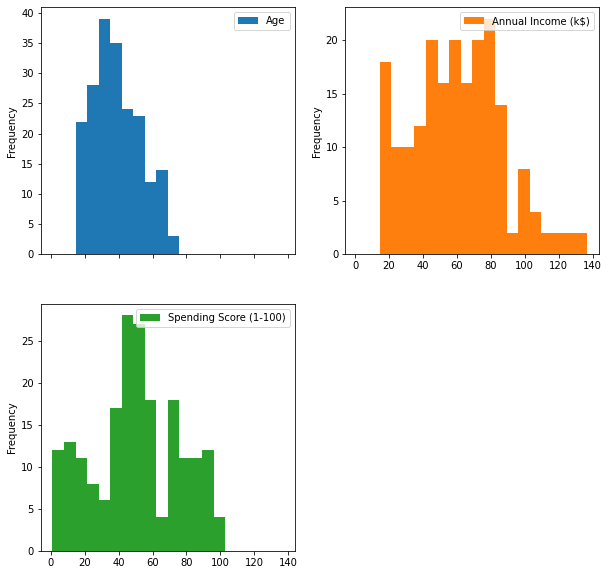

In [34]:
Data.plot.hist(subplots=True, layout=(2,2),figsize=(10,10), bins=20)

In [36]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(Data)
data_standard = scaler.transform(Data)
data_standard = pd.DataFrame(data_standard, index=Data.index, columns=Data.columns)
data_standard.describe().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000
mean,-0.000,-0.000,-0.000
std,1.003,1.003,1.003
min,-1.496,-1.739,-1.910
25%,-0.725,-0.728,-0.600
50%,-0.205,0.036,-0.008
75%,0.728,0.666,0.885
max,2.236,2.918,1.894


## KMeans Algorithm and Optimal Number of Clusters

In [42]:
def optimal_Kmeans (dataset, start=2, end=11):
   
    n_clu = []
    km_ss = []
    inertia = []
    for n_clusters in range(start, end):

        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1]).round(3)))
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares(elbow method)')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.293, SS Delta: 0.0, Inertia: 212840.17, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.384, SS Delta: 0.091, Inertia: 143342.75, Inertia Delta: -69497.42
No. Clusters: 4, Silhouette Score(SS): 0.405, SS Delta: 0.021, Inertia: 104366.15, Inertia Delta: -38976.6
No. Clusters: 5, Silhouette Score(SS): 0.444, SS Delta: 0.039, Inertia: 75350.78, Inertia Delta: -29015.37
No. Clusters: 6, Silhouette Score(SS): 0.452, SS Delta: 0.008, Inertia: 58316.49, Inertia Delta: -17034.29
No. Clusters: 7, Silhouette Score(SS): 0.441, SS Delta: -0.011, Inertia: 51084.51, Inertia Delta: -7231.98
No. Clusters: 8, Silhouette Score(SS): 0.426, SS Delta: -0.015, Inertia: 44342.32, Inertia Delta: -6742.19
No. Clusters: 9, Silhouette Score(SS): 0.388, SS Delta: -0.038, Inertia: 40867.03, Inertia Delta: -3475.29
No. Clusters: 10, Silhouette Score(SS): 0.385, SS Delta: -0.003, Inertia: 37532.18, Inertia Delta: -3334.85


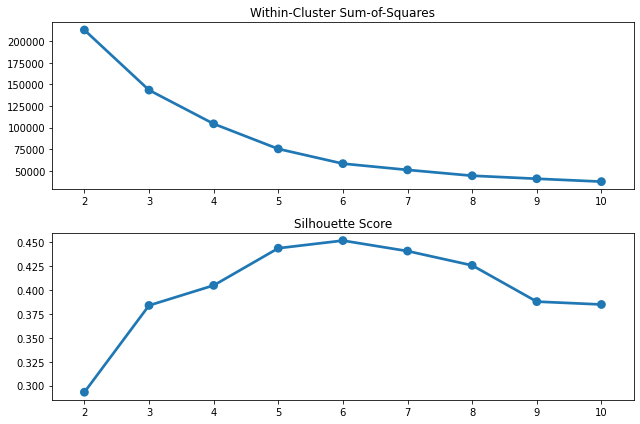

In [43]:
optimal_kmeans(Data)

In [44]:
def kmeans(data_standard, clusters_number, Data):
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(Data)
    cluster_labels = kmeans.labels_
    Data_new = Data.assign(Cluster = cluster_labels)
    model = TSNE(random_state=1)
    transformed = model.fit_transform(Data_new)
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return Data_new

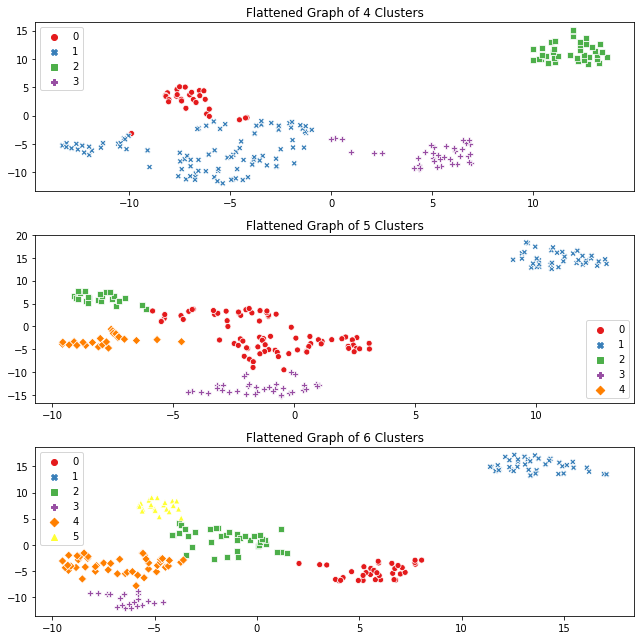

In [45]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
data_k4 = kmeans(data_standard, 4, Data)
plt.subplot(3, 1, 2)
data_k5 = kmeans(data_standard, 5, Data)
plt.subplot(3, 1, 3)
data_k6 = kmeans(data_standard, 6, Data)
plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

##                                          The End! 